In [24]:
import sys
import pandas as pd
sys.path.append("/home/antonlee/github.com/tachyonicClock/SurpriseNetRun/SurpriseNet")
from study.study import vizier_client_via_ssh, vz

client = vizier_client_via_ssh(
    owner="SurpriseNet",
    study_id="S-CIFAR100_DeepVAE_0"
)
# client.delete()

In [23]:

trial_records = []
for trial in client.trials():
    trial = trial.materialize()


    trial_record = {}
    trial_record["feasible"] = trial._infeasibility_reason is None
    trial_record["length"] = trial.duration
    trial_record["GitCommit"] = trial.metadata["GitCommit"]
    in_progress = trial.final_measurement is None

    print(f"{trial.assigned_worker} {trial.metadata['ExperimentLabel']} {'Feasible' if trial_record['feasible'] else 'Infeasible'} {'IN_PROGRESS'if in_progress else 'DONE'}")

    for param_name, param in trial.parameters.items():
        trial_record[param_name] = float(param.value)

    print(trial.parameters)

    if in_progress:
        continue
    for metric_name, metric in trial.final_measurement.metrics.items():
        trial_record[metric_name] = float(metric.value)

    trial_records.append(trial_record)

df = pd.DataFrame(trial_records)


cuda6.ecs.vuw.ac.nz::1646873 0001_S-CIFAR100_DeepVAE_0 Feasible IN_PROGRESS
ParameterDict(_items={'classifier_loss_weight': 1.0, 'total_task_epochs': 200.0, 'hvae_loss_kwargs.beta_warmup': 50.0, 'retrain_epochs': 10.0, 'learning_rate': 0.0018364392671343665, 'prune_proportion': 0.7784140004745028})
cuda2.sms.vuw.ac.nz::2855756 0001_S-CIFAR100_DeepVAE_0 Feasible IN_PROGRESS
ParameterDict(_items={'classifier_loss_weight': 1.0, 'total_task_epochs': 200.0, 'hvae_loss_kwargs.beta_warmup': 50.0, 'retrain_epochs': 10.0, 'learning_rate': 0.0010555481175921488, 'prune_proportion': 0.5132273203534128})
cuda8.ecs.vuw.ac.nz::344724 0001_S-CIFAR100_DeepVAE_0 Feasible IN_PROGRESS
ParameterDict(_items={'classifier_loss_weight': 1.0, 'total_task_epochs': 200.0, 'hvae_loss_kwargs.beta_warmup': 50.0, 'retrain_epochs': 10.0, 'learning_rate': 0.0017245928785280592, 'prune_proportion': 0.7069710135925653})
cuda9.ecs.vuw.ac.nz::3567216 0001_S-CIFAR100_DeepVAE_0 Feasible IN_PROGRESS
ParameterDict(_items={'cl

In [21]:
df

""


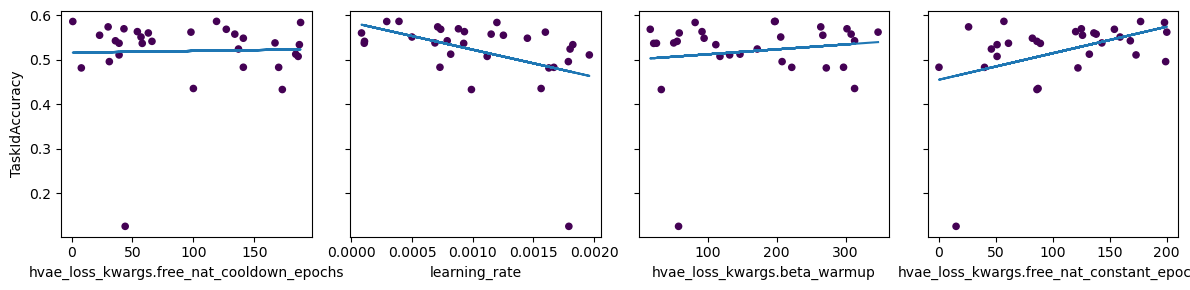

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import typing as t 

def plot_hyper_parameter(df: pd.DataFrame, independent_vars: t.List[str], dependent_var: str):
    fig, axis = plt.subplots(1, len(independent_vars), sharey=True, figsize=(len(independent_vars)*3, 3), tight_layout=True)

    for i, independent_var in enumerate(independent_vars):
        df.plot.scatter(x=independent_var, y=dependent_var, ax=axis[i], c=df["feasible"])
        # Fit line

        try:
            feasible_points = df[df["feasible"] == True]
            x = feasible_points[independent_var]
            y = feasible_points[dependent_var]

            # Linear regression
            m, b = np.polyfit(x, y, 1)
            axis[i].plot(x, m*x + b)
        except Exception:
            pass

        axis[i].set_xlabel(independent_var)
        axis[i].set_ylabel(dependent_var)


plot_hyper_parameter(df, ["hvae_loss_kwargs.free_nat_cooldown_epochs", "learning_rate", "hvae_loss_kwargs.beta_warmup", "hvae_loss_kwargs.free_nat_constant_epochs"], "TaskIdAccuracy")


Text(0, 0.5, 'TaskIdAccuracy')

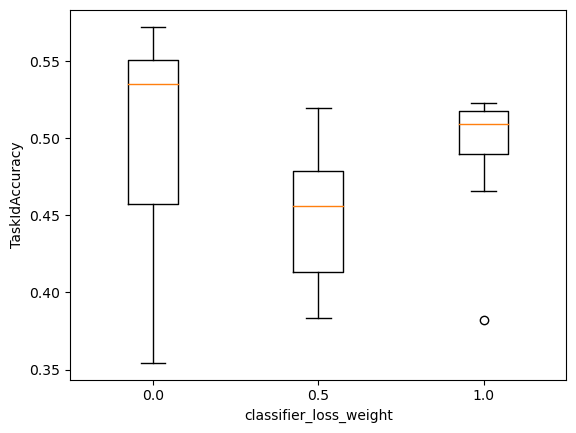

In [80]:
# Box and whisker plot of classifier_loss_weight

# remove outliers
no_outliers = df[df["TaskIdAccuracy"] > 0.25]

boxes = []
labels = []
for loss_weight, points in no_outliers.groupby("classifier_loss_weight"):
    boxes.append(points["TaskIdAccuracy"])
    labels.append(loss_weight)

plt.boxplot(boxes, labels=labels)

# Label the axes
plt.xlabel("classifier_loss_weight")
plt.ylabel("TaskIdAccuracy")


# plt.boxplot(no_outliers["TaskIdAccuracy"])

In [3]:
import matplotlib.pyplot as plt

x = []
y = []
value = []

for trial in client.trials():
    trial = trial.materialize()
    if trial.final_measurement is None:
        continue

    value.append(trial.final_measurement.metrics["maximize_metric"].value)
    # x.append(float(trial.parameters["x"].value))
    # y.append(float(trial.parameters["y"].value))

plt.scatter(x, y, c=value)


KeyError: 'maximize_metric'